In [5]:
import pandas as pd
import numpy as np

# https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = {
    "Name": ["Alice", "Bob", "Charlie"],
    "Age": [25, 30, 35],
    "City": ["New York", "Los Angeles", "Chicago"]
}
df = pd.DataFrame(data)
df

,Name,Age,City
0,Alice,25,New York
1,Bob,30,Los Angeles
2,Charlie,35,Chicago


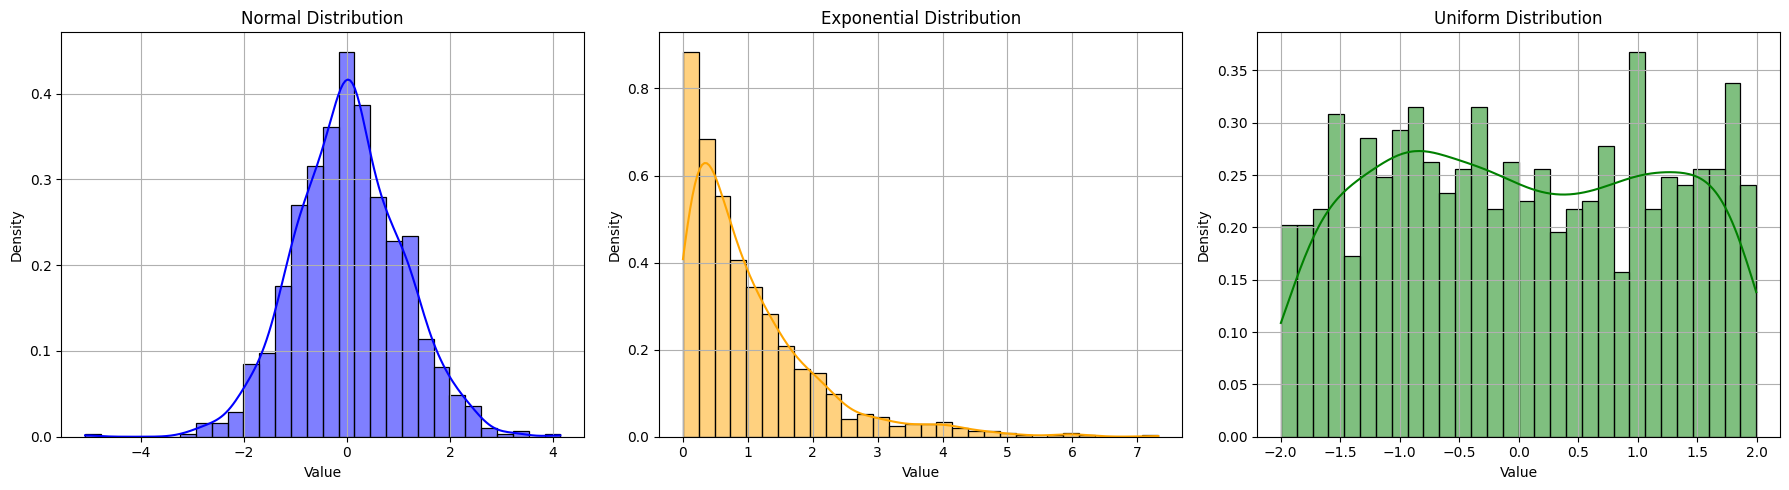

In [ ]:
# 1. Normal Distribution
normal_data = np.random.normal(loc=0, scale=1, size=1000)
# loc = Mean =0, scale is standard deviation


# 2. Exponential Distribution
exponential_data = np.random.exponential(scale=1, size=1000)
#Parameters of an Exponential Distribution: 1- Rate parameter (λ, lambda), Scale parameter (β)
#This is the mean (average) waiting time between events. invesr of lambda


# 3. Uniform Distribution
uniform_data = np.random.uniform(low=-2, high=2, size=1000)
# low=-2 The minimum value (start of the interval).No number smaller than -2 will be generated.
# high=2 The maximum value (end of the interval).


fig, axes = plt.subplots(1, 3, figsize=(18, 5)) # plt.subplots(1, 3, ...) Creates a figure (fig) and an array 
# of subplots (axes). 1, 3 means → 1 row, 3 columns → 3 plots side by side.

# Normal distribution
sns.histplot(normal_data, bins=30, kde=True, color='blue', stat="density", ax=axes[0])
axes[0].set_title("Normal Distribution")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Density")
axes[0].grid(True)

# Exponential distribution
sns.histplot(exponential_data, bins=30, kde=True, color='orange', stat="density", ax=axes[1])
axes[1].set_title("Exponential Distribution")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Density")
axes[1].grid(True)

# Uniform distribution
sns.histplot(uniform_data, bins=30, kde=True, color='green', stat="density", ax=axes[2])
axes[2].set_title("Uniform Distribution")
axes[2].set_xlabel("Value")
axes[2].set_ylabel("Density")
axes[2].grid(True)

plt.tight_layout() 
plt.show()

In [14]:
# Number of rows
n = 1000
np.random.seed(42)

# Features
data = {
    "SoilFertility": np.random.uniform(1, 10, n),
    "Rainfall": np.random.uniform(200, 1200, n),
    "AvgTemp": np.random.uniform(10, 35, n),
    "SoilMoisture": np.random.uniform(5, 40, n),
    "FertilizerUse": np.random.uniform(0, 300, n),
    "PestPressure": np.random.uniform(0, 10, n),
    "Latitude": np.random.uniform(-10, 50, n),
    "Longitude": np.random.uniform(-80, 120, n),
}

data["CropYield"] = (
    0.2 * data["SoilFertility"]
    + 0.005 * data["Rainfall"]
    - 0.02 * data["PestPressure"]
    + 0.01 * data["FertilizerUse"]
    + np.random.normal(0, 3.0, n)   # big noise added
)

# Create DataFrame
df_crop = pd.DataFrame(data)
df_crop.tail()

,SoilFertility,Rainfall,AvgTemp,SoilMoisture,FertilizerUse,PestPressure,Latitude,Longitude,CropYield
995,1.824239,856.955156,31.632394,20.473746,269.219195,6.844354,24.784227,-25.368076,4.028528
996,9.255822,1156.614621,13.931830,16.704041,35.814303,5.032204,30.022211,-38.096155,5.745198
997,2.231368,268.958016,17.744696,18.810031,98.352851,7.651488,44.694613,11.065750,5.986060
998,9.552136,257.054721,17.251138,23.547921,244.723614,4.852906,10.737210,101.687510,3.562804
999,5.014052,482.187075,31.785351,10.647858,179.193713,1.493816,27.290439,-59.103937,3.630990


In [15]:
x = df_crop.drop('CropYield', axis = 1).values
y = df_crop['CropYield'].values

# Train-Test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=432)


print("number of train samples:", len(x_train))
print("number of test samples:", len(x_test))

number of train samples: 800
number of test samples: 200


In [16]:
from sklearn.linear_model import LinearRegression

# choose algorithm
model = LinearRegression()

model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
rmsd = np.sqrt(mean_squared_error(y_test, y_pred))
print('R2:', r2)
print('RMSD:', rmsd)

R2: 0.32339847315884807
RMSD: 3.2388455238474565


In [18]:
# Feature engneering

from sklearn.preprocessing import PolynomialFeatures
print('old:', len(x_train[0]))

poly = PolynomialFeatures()

x_train = poly.fit_transform(x_train)
x_test = poly.fit_transform(x_test)

print('new:', len(x_train[0]))

old: 8
new: 45


linear regression
multiple regression
polynomial regression

In [19]:
from sklearn.ensemble import (
    GradientBoostingRegressor, 
    RandomForestRegressor
)

# initialize models
LR = LinearRegression()
GBR = GradientBoostingRegressor()
RFR = RandomForestRegressor()

# iterate over models, training and evaluating each

for model in [LR, GBR, RFR]:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    rmsd = np.sqrt(mean_squared_error(y_test, y_pred))
    print("MODEL:", model)
    print("R2 SCORE:", r2)
    print("RMSD:", rmsd)
    print("-------------")

MODEL: LinearRegression()
R2 SCORE: 0.32163976748079126
RMSD: 3.2430521942734263
-------------
MODEL: GradientBoostingRegressor()
R2 SCORE: 0.26702723407803575
RMSD: 3.3710691979981844
-------------
MODEL: RandomForestRegressor()
R2 SCORE: 0.30177140038233874
RMSD: 3.2902020224623265
-------------
